# Question 1: Given some sample data, write a program to answer the following:

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

a.	Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

b.	What metric would you report for this dataset?

c.	What is its value?


In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [55]:
# read input data into a dataframe
data = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set.csv")
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [54]:
# get descriptive statistics for quantitative fields
data[['order_amount','total_items']].describe()

,order_amount,total_items
count,5000.000000,5000.00000
mean,3145.128000,8.78720
std,41282.539349,116.32032
min,90.000000,1.00000
25%,163.000000,1.00000
50%,284.000000,2.00000
75%,390.000000,3.00000
max,704000.000000,2000.00000


We see that average order amount is $3145.128, the minimum order amount is $90 and maximum order amount is $704000. 
Standard deviation is exteremly large, indicating that most order_amounts are farther away from the average order value .

Since Sneakers are relatively cheaper, this average order amount, 
which is equal to (sum of order_amount)/(total_orders) is clearly incorrect.

Let's dive deeper into the data to investigate further

In [65]:
shop_id = data.shop_id.unique()
shop_id.sort()

store_order_amount = data.groupby(data['shop_id']).order_amount.agg(["min","max","sum","count","mean"])
store_order_amount['shop_id'] = shop_id
store_order_amount.sort_values(by=['min'], ascending=False)

,min,max,sum,count,mean,shop_id
shop_id,,,,,,
78,25725,154350,2263800,46,49213.043478,78
42,352,704000,11990176,51,235101.490196,42
12,201,804,18693,53,352.698113,12
89,196,980,23128,61,379.147541,89
99,195,780,18330,54,339.444444,99
...,...,...,...,...,...,...
53,112,560,14560,68,214.117647,53
100,111,444,8547,40,213.675000,100
32,101,404,7979,42,189.976190,32


Above table shows aggregate order_amount data for each store
Values in 'min' column incidate the cost of one unit of sneaker-pair at a given store.
Values in 'max' column incidate the max order_amount at a given store.

Observations:
1. The max order amounts at store 78 and 42 are unsual compared to the rest of the stores, they are much larger.
2. At store 78, we see that the cost of one pair of sneakers is $25,725 which is causing higher order amounts at this store
3. At store 42, although the price of a pair of sneakers is $352, which is reasonable, this store has the highest order amount (see corresponding value in 'max' column)

In [63]:
store_order_items = data.groupby(data['shop_id']).total_items.agg(["min","max","sum"])
store_order_items['shop_id'] = shop_id
store_order_items.sort_values(by=['max'], ascending=False)

,min,max,sum,shop_id
shop_id,,,,
42,1,2000,34063,42
54,1,8,104,54
78,1,6,88,78
83,1,6,81,83
86,1,6,111,86
...,...,...,...,...
62,1,4,83,62
63,1,4,113,63
100,1,4,77,100


The above table shows aggregate values of total_items for each store

Store 42 has the highest order amount because of the higher quantities per order at this store. Certain orders have a quantity of 2000. 
The next highest order quantity is 8, at store 54. 

The order of 2000 units at store 42 looks more like a wholesale purchase rather than a retail. 
Note: These orders were generated by the same user_id and at the same time on a given day, the validity of these orders should be checked.

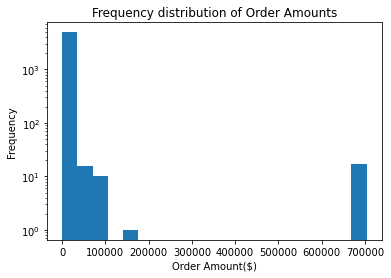

In [121]:
# Frequency distribution of order amounts
x = data['order_amount']
plt.hist(x, bins=20, log=True)

plt.title("Frequency distribution of Order Amounts")
plt.xlabel("Order Amount($)")
plt.ylabel("Frequency")

plt.show()

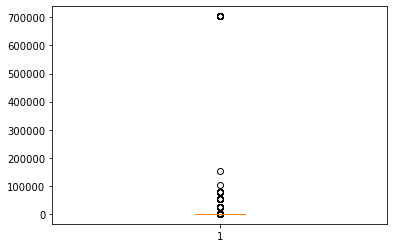

In [105]:
# Box Plot of order_amount to check the qunatiles
plt.boxplot(x)

plt.show()

# What could be going wrong with the calculation of average order value?

The average order value is skewed, large order_amounts at store 42 and 78 explain the skew. 
The average order value is clearly influenced by these outliers. 
The frequency distribution plot also shows that the order_amount is not normally distributed.

Therefore average order value might not be the best way to accurately reflect an order value in the dataset. 

# What metric would you report for this dataset?

The metric ideally depends on the business question we are trying to answer.

In this case, if we are trying to find an order value that centralizes the dataset, 
median would be a better metric since it is not as strongly influenced by skewed values. 

I wouldn't go with mode as a metric since every store sells a different sneaker style that has different unit price.

# What is its value?

In [116]:
median_amt = data['order_amount'].median()

print("The median order amount is: $", median_amt)

The median order amount is: $ 284.0
